In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Read Data

In [2]:
transit_survey = pd.read_csv('Data/transit_survey.csv')
transit_survey.head()

,NTDID,AgencyName,OrgType,reptype,id,survey_response,pop,mile,VOMS,revenue,City,County,Address,Zip
0,NaN,Access Services,Independent Public Agency,NaN,NaN,0,NaN,NaN,NaN,NaN,El Monte,NaN,PO Box 5728,91734
1,90014,Alameda-Contra Costa Transit District,Independent Public Agency,Full Reporter,Principal City,0,1425275.0,364.0,794.0,520172455.0,Oakland,Alameda,1600 Franklin Street,94612
2,90247,Alhambra,Local Government,Reduced Reporter,Suburban City,0,83089.0,8.0,15.0,1893158.0,Alhambra,Los Angeles,111 S First Street,91801
3,NaN,Alpine County Local Transportation Commission,MPO/RTPA,NaN,NaN,1,NaN,NaN,NaN,NaN,Markleeville,NaN,50 Diamond Valley Road,96120
4,90182,Altamont Corridor Express,Independent Public Agency,Full Reporter,Principal City,1,4094704.0,28.0,34.0,39739603.0,Stockton,San Joaquin,NaN,NaN


In [3]:
transit_survey_video = pd.read_csv('Data/transit_survey_agencies_video_V2.csv')
transit_survey_video = transit_survey_video.drop(0)
transit_survey_video['Video/ Audio'] = transit_survey_video['Video/ Audio'].str.lower()
transit_survey_video.head()

transit_survey_video['post_video'] = 0
transit_survey_video.loc[transit_survey_video['Count - video(past 12 months)']>12, 'post_video'] = 1
transit_survey_video.head()

,Video/ Audio,URL,Transit relevent ?,Count - video(past 12 months),Count - Meetings (past 12 months),Transportation Commission/City Counsil/ Planning Commission?,Mentioned Transportation Topic?,Transportation Commission Existed?,Transportation Commission video posted (>2 in the last year)?,"If no transportation commission, other meetings posted?",...,Zip,Phone,Primary Contact - Title,CALACT,Contact,Email.y,CATEGORY,OT,City,post_video
1,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91734,213-270-6000,Strategic Planner,CALACT Member,Eric Haack,Haack@accessla.org,NaN,Independent Public Agency,El Monte,0
2,granicus,https://actransit.legistar.com/Calendar.aspx,Yes,36.0,90,NaN,NaN,NaN,NaN,NaN,...,94612,510-891-7213,Accessible Services Manager,CALACT Member,Mallory Nestor-Brush,mnestor@actransit.org,NaN,Independent Public Agency,Oakland,1
3,own website,https://spectrumstream.com/streaming/alhambra/...,No,19.0,150,NaN,NaN,NaN,NaN,NaN,...,91801,626-570-3254,Fleet Manager,CALACT Member,Joseph Villegas,jvillegas@cityofalhambra.org,NaN,Local Government,Alhambra,1
4,own website,http://alpinecountyca.iqm2.com/citizens/defaul...,No,30.0,43,NaN,NaN,NaN,NaN,NaN,...,96120,530-694-2140,Community Development Manager,CALACT Member,Debbie Burkett,dburkett@alpinecountyca.gov,NaN,MPO/RTPA,Markleeville,1
5,youtube,https://www.youtube.com/@altamontcorridorexpre...,No,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent Public Agency,Stockton,0


In [4]:
transit_survey_video['AgencyName']

1                                   Access Services
2             Alameda-Contra Costa Transit District
3                                  City of Alhambra
4                                               NaN
5                         Altamont Corridor Express
                           ...                     
222                                             NaN
223             Yolo County Transportation District
224    Yosemite Area Regional Transportation System
225                   Yuba-Sutter Transit Authority
226                                     Yurok Tribe
Name: AgencyName, Length: 226, dtype: object

In [5]:
transit_survey['AgencyName']

0                                    Access Services
1              Alameda-Contra Costa Transit District
2                                           Alhambra
3      Alpine County Local Transportation Commission
4                          Altamont Corridor Express
                           ...                      
221                               Whittier - Transit
222              Yolo County Transportation District
223     Yosemite Area Regional Transportation System
224                    Yuba-Sutter Transit Authority
225                                      Yurok Tribe
Name: AgencyName, Length: 226, dtype: object

# Data Exploratory

## Meta data

Text(0.5, 1.0, 'Type of cities')

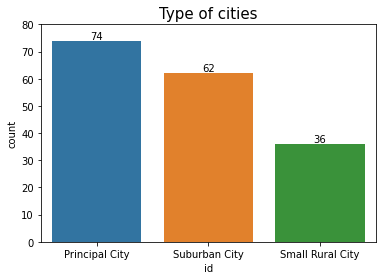

In [6]:
ax = sns.countplot(data = transit_survey_video, x = 'id')

for container in ax.containers:
    ax.bar_label(container)
    
plt.ylim(0,80)
plt.title('Type of cities', fontsize = 15)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Independent Public Agency'),
  Text(1, 0, 'Local Government'),
  Text(2, 0, 'MPO/RTPA'),
  Text(3, 0, 'Other')])

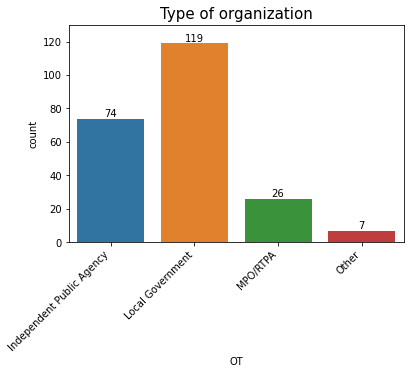

In [7]:
ax = sns.countplot(data = transit_survey_video, x = 'OT')

for container in ax.containers:
    ax.bar_label(container)

plt.ylim(0,130)
plt.title('Type of organization', fontsize = 15)
plt.xticks(rotation = 45, horizontalalignment='right')

Text(0.5, 1.0, 'Population')

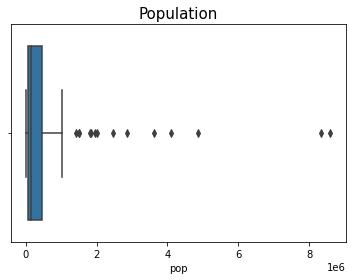

In [8]:
sns.boxplot(data = transit_survey_video, x = 'pop')
plt.title('Population', fontsize = 15)

Text(0.5, 1.0, 'Revenue')

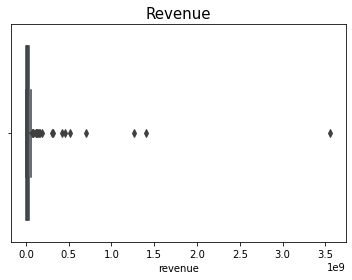

In [9]:
sns.boxplot(data = transit_survey_video, x = 'revenue')
plt.title('Revenue', fontsize = 15)

Text(0.5, 1.0, 'Revenue per capita')

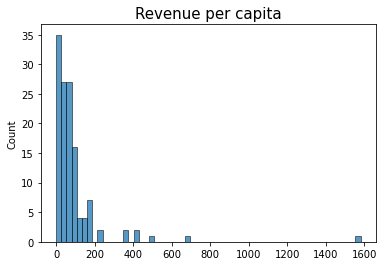

In [10]:
rev_per_capita = transit_survey_video['revenue']/transit_survey_video['pop']

sns.histplot(data = rev_per_capita)
plt.title('Revenue per capita', fontsize = 15)

Text(0.5, 1.0, 'Meeting video platform')

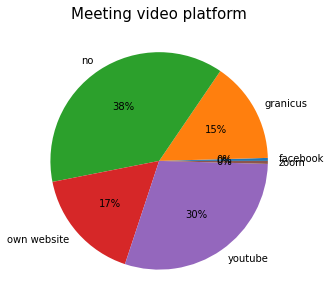

In [11]:
# Have video recoding posted online or not
plt.figure(figsize = (5,5))
plt.pie(transit_survey_video['Video/ Audio'].value_counts().sort_index(), labels = transit_survey_video['Video/ Audio'].value_counts().sort_index().index.tolist(), autopct='%.0f%%')
plt.title('Meeting video platform', fontsize = 15)

Text(0.5, 1.0, 'Transit relevent content')

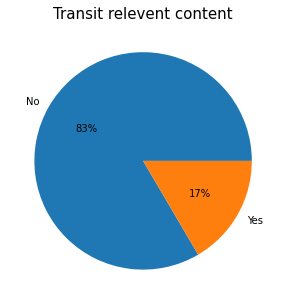

In [12]:
# Has transit relevent meterials?
plt.figure(figsize = (5,5))
plt.pie(transit_survey_video['Transit relevent ?'].value_counts().sort_index(), labels = transit_survey_video['Transit relevent ?'].value_counts().sort_index().index.tolist(), autopct='%.0f%%')
plt.title('Transit relevent content', fontsize = 15)


Text(0.5, 1.0, 'Number of video posted')

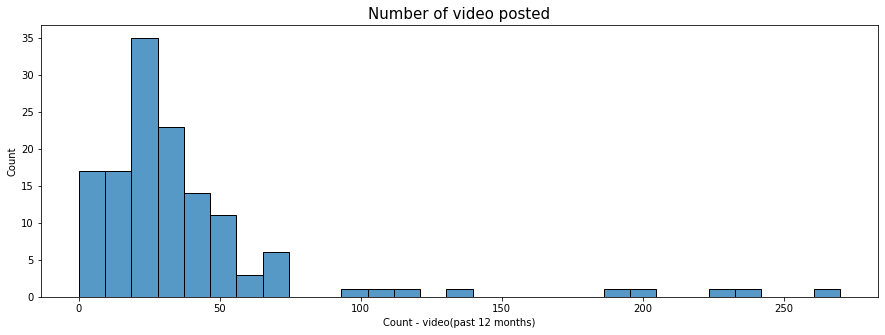

In [13]:
# Number of videos posted in the past 12 months
plt.figure(figsize = (15,5))
sns.histplot(data = transit_survey_video['Count - video(past 12 months)'])
plt.title('Number of video posted', fontsize = 15)

## Angencies responded to survey

In [14]:
responded = transit_survey_video[transit_survey_video['survey_response'] == 1]
responded.head()

,Video/ Audio,URL,Transit relevent ?,Count - video(past 12 months),Count - Meetings (past 12 months),Transportation Commission/City Counsil/ Planning Commission?,Mentioned Transportation Topic?,Transportation Commission Existed?,Transportation Commission video posted (>2 in the last year)?,"If no transportation commission, other meetings posted?",...,Zip,Phone,Primary Contact - Title,CALACT,Contact,Email.y,CATEGORY,OT,City,post_video
4,own website,http://alpinecountyca.iqm2.com/citizens/defaul...,No,30.0,43,NaN,NaN,NaN,NaN,NaN,...,96120,530-694-2140,Community Development Manager,CALACT Member,Debbie Burkett,dburkett@alpinecountyca.gov,NaN,MPO/RTPA,Markleeville,1
5,youtube,https://www.youtube.com/@altamontcorridorexpre...,No,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent Public Agency,Stockton,0
6,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95642-9525,209-267-9395,General Manager,CALACT Member,Patricia Amarant,maggie@amadortransit.com,NaN,Independent Public Agency,Jackson,0
7,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Anaheim,0
8,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93534,661-945-9445,Executive Director/Chief Executive Officer,CALACT Member,Macy Neshati,Mneshati@avta.com,NaN,Independent Public Agency,Lancaster,0


In [15]:
no_response = transit_survey_video[transit_survey_video['survey_response'] == 0]
no_response.head()

,Video/ Audio,URL,Transit relevent ?,Count - video(past 12 months),Count - Meetings (past 12 months),Transportation Commission/City Counsil/ Planning Commission?,Mentioned Transportation Topic?,Transportation Commission Existed?,Transportation Commission video posted (>2 in the last year)?,"If no transportation commission, other meetings posted?",...,Zip,Phone,Primary Contact - Title,CALACT,Contact,Email.y,CATEGORY,OT,City,post_video
1,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91734,213-270-6000,Strategic Planner,CALACT Member,Eric Haack,Haack@accessla.org,NaN,Independent Public Agency,El Monte,0
2,granicus,https://actransit.legistar.com/Calendar.aspx,Yes,36.0,90,NaN,NaN,NaN,NaN,NaN,...,94612,510-891-7213,Accessible Services Manager,CALACT Member,Mallory Nestor-Brush,mnestor@actransit.org,NaN,Independent Public Agency,Oakland,1
3,own website,https://spectrumstream.com/streaming/alhambra/...,No,19.0,150,NaN,NaN,NaN,NaN,NaN,...,91801,626-570-3254,Fleet Manager,CALACT Member,Joseph Villegas,jvillegas@cityofalhambra.org,NaN,Local Government,Alhambra,1
9,own website,https://spectrumstream.com/streaming/arcadia/l...,No,21.0,21,NaN,NaN,NaN,NaN,NaN,...,91066-6021,626-574-5435,Transportation Services Manager,CALACT Member,Linda Hui,lhui@arcadiaca.gov,Local Government,Local Government,Arcadia,1
10,own website,http://arcataca.iqm2.com/Citizens/Calendar.aspx,No,68.0,128,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Local Government,Arcata,1


Text(0.5, 1.0, 'Type of cities')

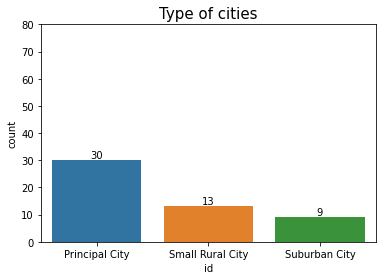

In [16]:
ax = sns.countplot(data = responded, x = 'id')

for container in ax.containers:
    ax.bar_label(container)
    
plt.ylim(0,80)
plt.title('Type of cities', fontsize = 15)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'MPO/RTPA'),
  Text(1, 0, 'Independent Public Agency'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Local Government')])

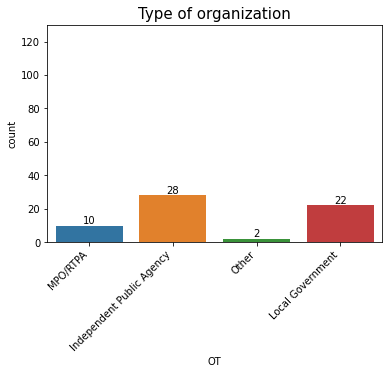

In [17]:
ax = sns.countplot(data = responded, x = 'OT')

for container in ax.containers:
    ax.bar_label(container)

plt.ylim(0,130)
plt.title('Type of organization', fontsize = 15)
plt.xticks(rotation = 45, horizontalalignment='right')

Text(0.5, 1.0, 'Population')

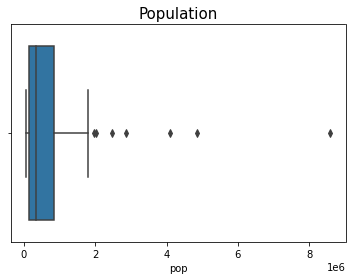

In [18]:
sns.boxplot(data = responded, x = 'pop')
plt.title('Population', fontsize = 15)

Text(0.5, 1.0, 'Revenue')

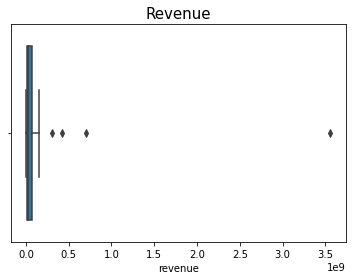

In [19]:
sns.boxplot(data = responded, x = 'revenue')
plt.title('Revenue', fontsize = 15)

Text(0.5, 1.0, 'Revenue per capita')

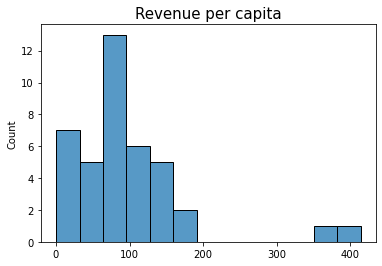

In [20]:
rev_per_capita_responded = responded['revenue']/responded['pop']

sns.histplot(data = rev_per_capita_responded)
plt.title('Revenue per capita', fontsize = 15)

Text(0.5, 1.0, 'Revenue per capita')

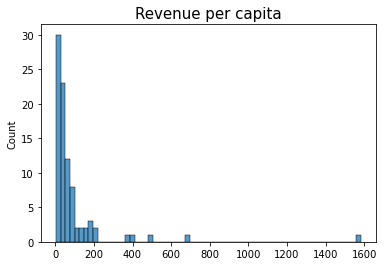

In [21]:
rev_per_capita_no_response = no_response['revenue']/no_response['pop']

sns.histplot(data = rev_per_capita_no_response)
plt.title('Revenue per capita', fontsize = 15)

In [22]:
transit_survey['id'].value_counts().index.tolist()

['Principal City', 'Suburban City', 'Small Rural City']

## Compare metadata and reponded data

Text(0.5, 1.0, 'No-response')

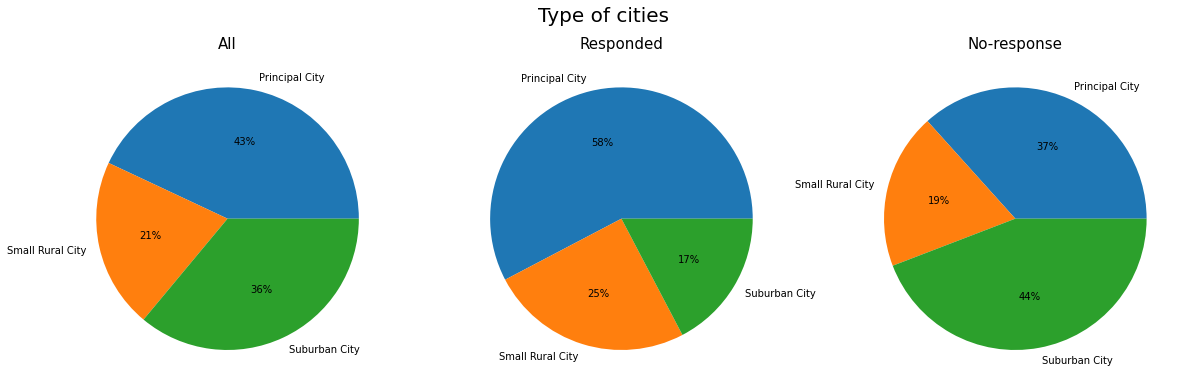

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(20, 16))

fig.suptitle('Type of cities', fontsize = 20, ha='center',va='bottom')
plt.subplots_adjust(top=1.5)

plt.subplot(131)
plt.pie(transit_survey_video['id'].value_counts().sort_index(), labels = transit_survey_video['id'].value_counts().sort_index().index.tolist(), autopct='%.0f%%')
plt.title('All', fontsize = 15)

plt.subplot(132)
plt.pie(responded['id'].value_counts().sort_index(), labels = responded['id'].value_counts().sort_index().index.tolist(), autopct='%.0f%%')
plt.title('Responded', fontsize = 15)

plt.subplot(133)
plt.pie(no_response['id'].value_counts().sort_index(), labels = no_response['id'].value_counts().sort_index().index.tolist(), autopct='%.0f%%')
plt.title('No-response', fontsize = 15)


Text(0.5, 1.0, 'No-response')

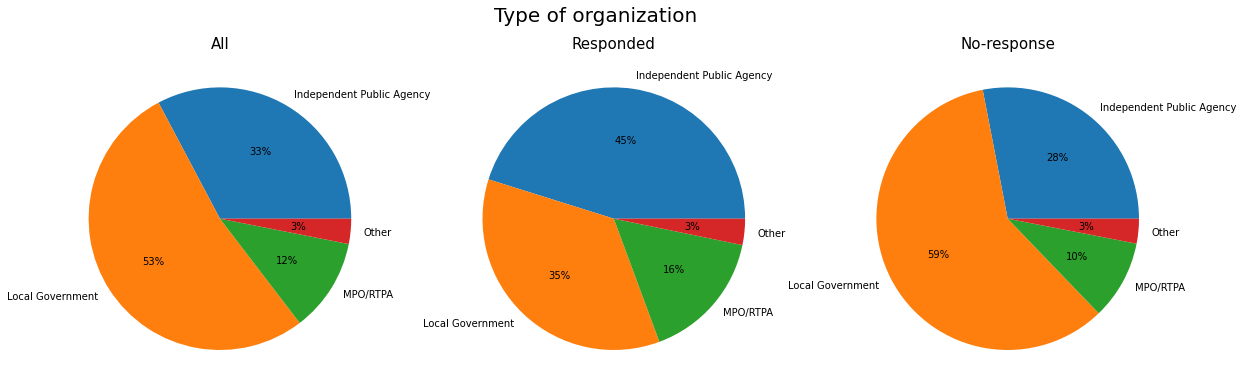

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(20, 16))

fig.suptitle('Type of organization', fontsize = 20, ha='center',va='bottom')
plt.subplots_adjust(top=1.5)

plt.subplot(131)
plt.pie(transit_survey_video['OT'].value_counts().sort_index(), 
        labels = transit_survey_video['OT'].value_counts().sort_index().index.tolist(), 
        autopct='%.0f%%')
plt.title('All', fontsize = 15)

plt.subplot(132)
plt.pie(responded['OT'].value_counts().sort_index(), 
        labels = responded['OT'].value_counts().sort_index().index.tolist(), 
        autopct='%.0f%%')
plt.title('Responded', fontsize = 15)

plt.subplot(133)
plt.pie(no_response['OT'].value_counts().sort_index(), 
        labels = no_response['OT'].value_counts().sort_index().index.tolist(), 
        autopct='%.0f%%')

plt.title('No-response', fontsize = 15)

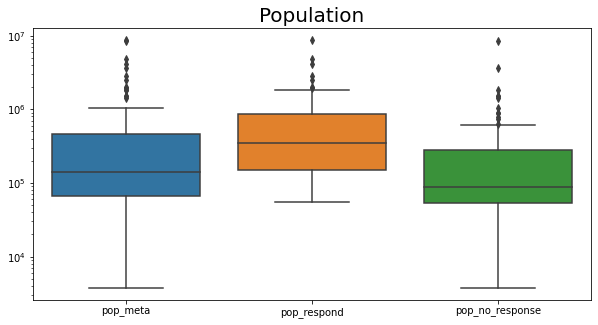

In [25]:
# In log scale
pop = pd.concat([transit_survey['pop'].reset_index(drop = True).rename('pop_meta'),
                 responded['pop'].reset_index(drop = True).rename('pop_respond'),
                 no_response['pop'].reset_index(drop = True).rename('pop_no_response')], axis = 1)

plt.figure(figsize = (10,5))
sns.boxplot(data = pop)
plt.title('Population', fontsize = 20)
plt.yscale('log')

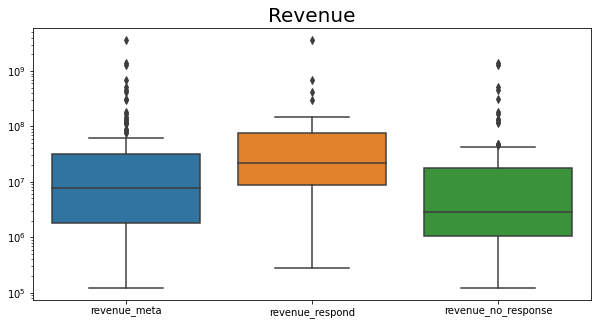

In [26]:
# In log scale
pop = pd.concat([transit_survey['revenue'].reset_index(drop = True).rename('revenue_meta'),
                 responded['revenue'].reset_index(drop = True).rename('revenue_respond'),
                 no_response['revenue'].reset_index(drop = True).rename('revenue_no_response')], axis = 1)

plt.figure(figsize = (10,5))
sns.boxplot(data = pop)
plt.title('Revenue', fontsize = 20)
plt.yscale('log')

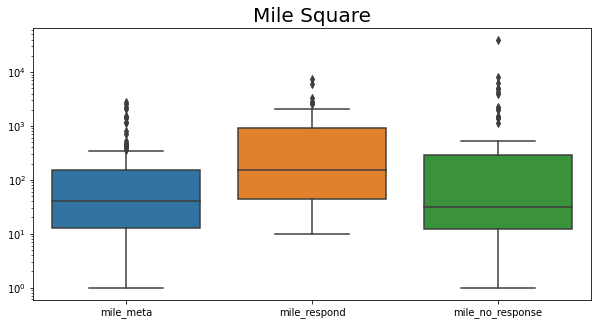

In [27]:
# In log scale
pop = pd.concat([transit_survey['mile'].reset_index(drop = True).rename('mile_meta'),
                 responded['mile'].reset_index(drop = True).rename('mile_respond'),
                 no_response['mile'].reset_index(drop = True).rename('mile_no_response')], axis = 1)

plt.figure(figsize = (10,5))
sns.boxplot(data = pop)
plt.title('Mile Square', fontsize = 20)
plt.yscale('log')

In [28]:
rev_per_capita_combine = pd.concat([rev_per_capita.reset_index(drop = True).rename('rev_per_capita_meta'), 
                                    rev_per_capita_responded.reset_index(drop = True).rename('rev_per_capita_respond'),
                                    rev_per_capita_no_response.reset_index(drop = True).rename('rev_per_capita_no_response')], axis = 1)
rev_per_capita_combine.head()

,rev_per_capita_meta,rev_per_capita_respond,rev_per_capita_no_response
0,NaN,NaN,NaN
1,364.962870,9.705122,364.962870
2,22.784701,NaN,22.784701
3,NaN,47.459341,31.810854
4,9.705122,96.563498,NaN


<AxesSubplot:ylabel='Percent'>

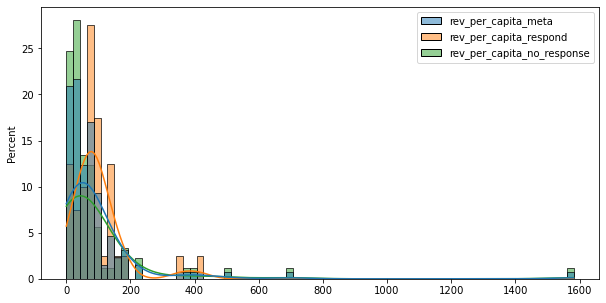

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data = rev_per_capita_combine, stat='percent', common_norm = False, kde = True)

Text(0.5, 1.0, 'Revenue per capita')

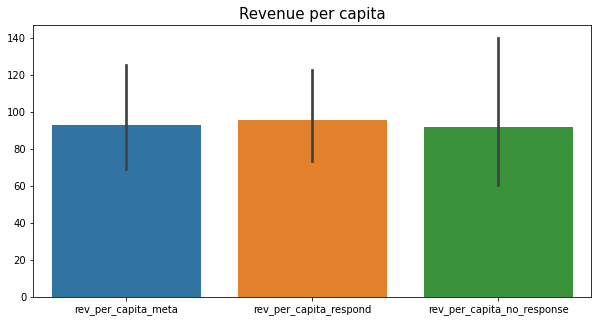

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data = rev_per_capita_combine)
plt.title('Revenue per capita', fontsize = 15)

In [31]:
max(rev_per_capita_combine['rev_per_capita_meta']), max(rev_per_capita_combine['rev_per_capita_respond'])

(nan, nan)

# Analysis - Agencies responded to survey

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA  
from sklearn.preprocessing import OneHotEncoder

In [33]:
'''One hot encoding type of city, type of organization'''

one_hot_encoded_meta = pd.get_dummies(transit_survey_video, columns = ['OT', 'id'])
one_hot_encoded_meta.head()

,Video/ Audio,URL,Transit relevent ?,Count - video(past 12 months),Count - Meetings (past 12 months),Transportation Commission/City Counsil/ Planning Commission?,Mentioned Transportation Topic?,Transportation Commission Existed?,Transportation Commission video posted (>2 in the last year)?,"If no transportation commission, other meetings posted?",...,CATEGORY,City,post_video,OT_Independent Public Agency,OT_Local Government,OT_MPO/RTPA,OT_Other,id_Principal City,id_Small Rural City,id_Suburban City
1,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,El Monte,0,1,0,0,0,0,0,0
2,granicus,https://actransit.legistar.com/Calendar.aspx,Yes,36.0,90,NaN,NaN,NaN,NaN,NaN,...,NaN,Oakland,1,1,0,0,0,1,0,0
3,own website,https://spectrumstream.com/streaming/alhambra/...,No,19.0,150,NaN,NaN,NaN,NaN,NaN,...,NaN,Alhambra,1,0,1,0,0,0,0,1
4,own website,http://alpinecountyca.iqm2.com/citizens/defaul...,No,30.0,43,NaN,NaN,NaN,NaN,NaN,...,NaN,Markleeville,1,0,0,1,0,0,0,0
5,youtube,https://www.youtube.com/@altamontcorridorexpre...,No,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Stockton,0,1,0,0,0,1,0,0


In [34]:
column = ['pop', 'mile', 'VOMS', 'revenue', 'OT_Independent Public Agency', 'OT_Local Government', 'OT_MPO/RTPA', 'id_Principal City', 'id_Small Rural City', 'id_Suburban City', 'survey_response', 'post_video']
sub_transit_survey_video = one_hot_encoded_meta[column]
sub_transit_survey_video.dropna()

,pop,mile,VOMS,revenue,OT_Independent Public Agency,OT_Local Government,OT_MPO/RTPA,id_Principal City,id_Small Rural City,id_Suburban City,survey_response,post_video
2,1425275.0,364.0,794.0,520172455.0,1,0,0,1,0,0,0.0,1
3,83089.0,8.0,15.0,1893158.0,0,1,0,0,0,1,0.0,1
5,4094704.0,28.0,34.0,39739603.0,1,0,0,1,0,0,1.0,0
7,358000.0,50.0,77.0,16990444.0,0,0,0,1,0,0,1.0,0
8,349050.0,1200.0,74.0,33705489.0,1,0,0,0,0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
219,107634.0,16.0,8.0,1301723.0,0,1,0,0,0,1,0.0,1
220,35288.0,2.0,10.0,2016784.0,0,1,0,0,0,1,0.0,1
221,64925.0,20.0,50.0,11422044.0,1,0,0,0,0,1,0.0,0
223,528880.0,109.0,50.0,17914239.0,1,0,0,0,1,0,0.0,0


In [35]:
'''normalize attributes before PCA'''

sub_transit_survey = one_hot_encoded_meta[column].dropna()
Normalized_meta = sub_transit_survey.copy()

column_norm = ['pop', 'mile', 'VOMS', 'revenue']
for col in column:
    Normalized_meta[col] = Normalizer().fit_transform(sub_transit_survey[col].values.reshape(1,-1)).reshape(-1,1)

Normalized_meta

,pop,mile,VOMS,revenue,OT_Independent Public Agency,OT_Local Government,OT_MPO/RTPA,id_Principal City,id_Small Rural City,id_Suburban City,survey_response,post_video
2,0.091160,0.057851,0.185551,0.123368,0.147442,0.000000,0.0,0.132453,0.00,0.000000,0.000000,0.11547
3,0.005314,0.001271,0.003505,0.000449,0.000000,0.114708,0.0,0.000000,0.00,0.133631,0.000000,0.11547
5,0.261894,0.004450,0.007946,0.009425,0.147442,0.000000,0.0,0.132453,0.00,0.000000,0.158114,0.00000
7,0.022897,0.007947,0.017994,0.004030,0.000000,0.000000,0.0,0.132453,0.00,0.000000,0.158114,0.00000
8,0.022325,0.190717,0.017293,0.007994,0.147442,0.000000,0.0,0.000000,0.00,0.133631,0.158114,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.006884,0.002543,0.001870,0.000309,0.000000,0.114708,0.0,0.000000,0.00,0.133631,0.000000,0.11547
220,0.002257,0.000318,0.002337,0.000478,0.000000,0.114708,0.0,0.000000,0.00,0.133631,0.000000,0.11547
221,0.004153,0.003179,0.011685,0.002709,0.147442,0.000000,0.0,0.000000,0.00,0.133631,0.000000,0.00000
223,0.033827,0.017323,0.011685,0.004249,0.147442,0.000000,0.0,0.000000,0.25,0.000000,0.000000,0.00000


## Essential attributes

### Linear Regression

In [36]:
log_meta = np.log(sub_transit_survey[['pop', 'mile', 'VOMS', 'revenue']])
log_meta[['survey_response','post_video']] = sub_transit_survey[['survey_response','post_video']]
log_meta

,pop,mile,VOMS,revenue,survey_response,post_video
2,14.169875,5.897154,6.677083,20.069671,0.0,1
3,11.327668,2.079442,2.708050,14.453757,0.0,1
5,15.225205,3.332205,3.526361,17.497859,1.0,0
7,12.788288,3.912023,4.343805,16.648162,1.0,0
8,12.762970,7.090077,4.304065,17.333171,1.0,0
...,...,...,...,...,...,...
219,11.586492,2.772589,2.079442,14.079199,0.0,1
220,10.471298,0.693147,2.302585,14.517015,0.0,1
221,11.080988,2.995732,3.912023,16.251056,0.0,0
223,13.178517,4.691348,3.912023,16.701106,0.0,0


In [37]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [38]:
'''
Y(survey_response) = a x log(pop) + c
'''

Y = log_meta['survey_response']
X = log_meta[['pop']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        survey_response   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     20.83
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           1.17e-05
Time:                        10:47:58   Log-Likelihood:                -73.783
No. Observations:                 129   AIC:                             151.6
Df Residuals:                     127   BIC:                             157.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1295      0.318     -3.555      0.001      -1.758      -0.501
pop            0.1192      0.026      4.564      0.000       0.068       0.171
==============================================================================
Omnibus:                       30.028   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.184
Skew:                           0.588   Prob(JB):                      0.00137
Kurtosis:                       1.965   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
'''
Y(survey_response) = a x log(revenue) + c
'''

Y = log_meta['survey_response']
X = log_meta[['revenue']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        survey_response   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     16.55
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           8.26e-05
Time:                        10:47:59   Log-Likelihood:                -75.676
No. Observations:                 129   AIC:                             155.4
Df Residuals:                     127   BIC:                             161.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8950      0.299     -2.996      0.003      -1.486      -0.304
revenue        0.0754      0.019      4.068      0.000       0.039       0.112
==============================================================================
Omnibus:                       36.507   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.184
Skew:                           0.603   Prob(JB):                     0.000832
Kurtosis:                       1.911   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
'''
Y(survey_response) = a x log(mile) + c
'''

Y = log_meta['survey_response']
X = log_meta[['mile']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        survey_response   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     23.23
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           4.03e-06
Time:                        10:47:59   Log-Likelihood:                -72.742
No. Observations:                 129   AIC:                             149.5
Df Residuals:                     127   BIC:                             155.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0866      0.091     -0.957      0.341      -0.266       0.093
mile           0.1016      0.021      4.820      0.000       0.060       0.143
==============================================================================
Omnibus:                       25.756   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.835
Skew:                           0.595   Prob(JB):                      0.00163
Kurtosis:                       2.014   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
'''
Y(survey_response) = a x log(pop) + b x log(revenue) + c
'''

Y = log_meta['survey_response']
X = log_meta[['pop', 'revenue']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        survey_response   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     10.45
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           6.32e-05
Time:                        10:48:00   Log-Likelihood:                -73.678
No. Observations:                 129   AIC:                             153.4
Df Residuals:                     126   BIC:                             161.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1495      0.322     -3.572      0.001      -1.786      -0.513
pop            0.0999      0.050      1.991      0.049       0.001       0.199
revenue        0.0159      0.035      0.453      0.652      -0.054       0.085
==============================================================================
Omnibus:                       30.963   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.805
Skew:                           0.566   Prob(JB):                      0.00166
Kurtosis:                       1.951   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
'''
Y(survey_response) = a x log(pop) + b x log(mile) + c
'''

Y = log_meta['survey_response']
X = log_meta[['pop', 'mile']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        survey_response   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     12.68
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           9.60e-06
Time:                        10:48:01   Log-Likelihood:                -71.748
No. Observations:                 129   AIC:                             149.5
Df Residuals:                     126   BIC:                             158.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6318      0.400     -1.580      0.117      -1.423       0.160
pop            0.0566      0.040      1.399      0.164      -0.023       0.137
mile           0.0661      0.033      2.010      0.047       0.001       0.131
==============================================================================
Omnibus:                       24.306   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.431
Skew:                           0.539   Prob(JB):                      0.00329
Kurtosis:                       2.017   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
'''
Y(survey_response) = a x log(pop) + b x log(mile)
'''

Y = log_meta['survey_response']
X = log_meta[['pop', 'mile']]

results = sm.OLS(Y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        survey_response   R-squared (uncentered):                   0.414
Model:                            OLS   Adj. R-squared (uncentered):              0.405
Method:                 Least Squares   F-statistic:                              44.92
Date:                Sun, 18 Jun 2023   Prob (F-statistic):                    1.77e-15
Time:                        10:48:01   Log-Likelihood:                         -73.013
No. Observations:                 129   AIC:                                      150.0
Df Residuals:                     127   BIC:                                      155.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pop           -0.0057      0.009     -0.616      0.539      -0.024       0.013
mile           0.0983      0.026      3.783      0.000       0.047       0.150
==============================================================================
Omnibus:                       29.642   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.111
Skew:                           0.629   Prob(JB):                     0.000863
Kurtosis:                       1.978   Cond. No.                         9.29
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Logistic Regression

In [44]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [45]:
def logit(Y, X):
    # convert y values to categorical values
    lab = preprocessing.LabelEncoder()
    y_transformed = lab.fit_transform(Y)

    X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.5, random_state=0)

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    y_pred = logreg.predict(X_test)

    print(classification_report(y_test, y_pred))
    print('------------------------------------------------------')
    print(pd.DataFrame(logreg.coef_.transpose(),X.columns.tolist(),columns=['Coefficient']))

In [46]:
'''
X = pop, mile
'''
Y = Normalized_meta['survey_response']
X = Normalized_meta[['pop','mile']]
logit(Y,X)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        41
           1       0.00      0.00      0.00        24

    accuracy                           0.63        65
   macro avg       0.32      0.50      0.39        65
weighted avg       0.40      0.63      0.49        65

------------------------------------------------------
      Coefficient
pop     -0.024651
mile     0.066242


/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [47]:
'''
X = pop, mile, revenue
'''
Y = Normalized_meta['survey_response']
X = Normalized_meta[['pop','mile', 'revenue']]
logit(Y,X)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        41
           1       0.00      0.00      0.00        24

    accuracy                           0.63        65
   macro avg       0.32      0.50      0.39        65
weighted avg       0.40      0.63      0.49        65

------------------------------------------------------
         Coefficient
pop        -0.023875
mile        0.066524
revenue    -0.042197


/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [48]:
'''
X = pop, mile, VOMS, revenue
'''
Y = Normalized_meta['survey_response']
X = Normalized_meta[['pop','mile', 'VOMS', 'revenue']]
logit(Y,X)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        41
           1       0.00      0.00      0.00        24

    accuracy                           0.63        65
   macro avg       0.32      0.50      0.39        65
weighted avg       0.40      0.63      0.49        65

------------------------------------------------------
         Coefficient
pop        -0.028564
mile        0.064626
VOMS        0.250485
revenue    -0.045943


/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [49]:
'''
X = mile, VOMS, revenue
'''
Y = Normalized_meta['survey_response']
X = Normalized_meta[['mile', 'VOMS', 'revenue']]
logit(Y,X)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        41
           1       0.00      0.00      0.00        24

    accuracy                           0.63        65
   macro avg       0.32      0.50      0.39        65
weighted avg       0.40      0.63      0.49        65

------------------------------------------------------
         Coefficient
mile        0.063534
VOMS        0.249920
revenue    -0.046494


/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Bird/miniforge3/envs/env_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Correlation Plot

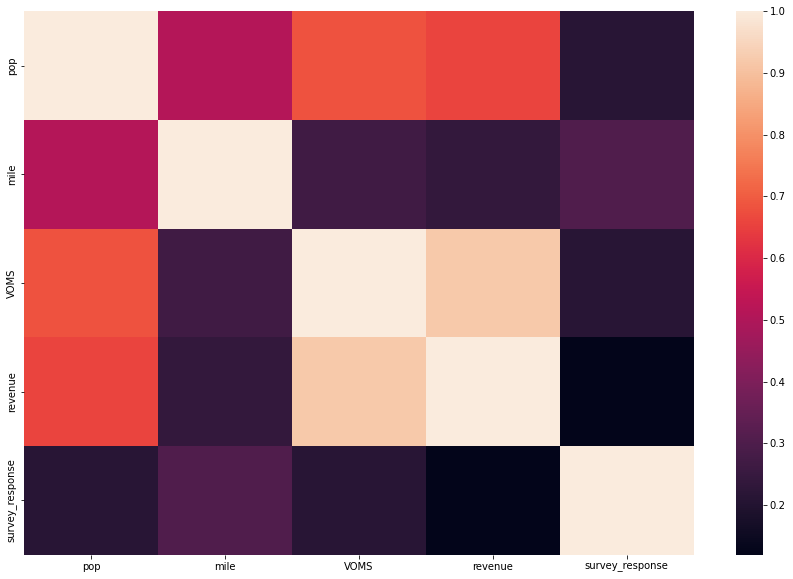

In [50]:
fig = plt.figure(figsize=[15, 10])
corr_matrix = Normalized_meta[['pop','mile', 'VOMS', 'revenue', 'survey_response']].corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

### PCA

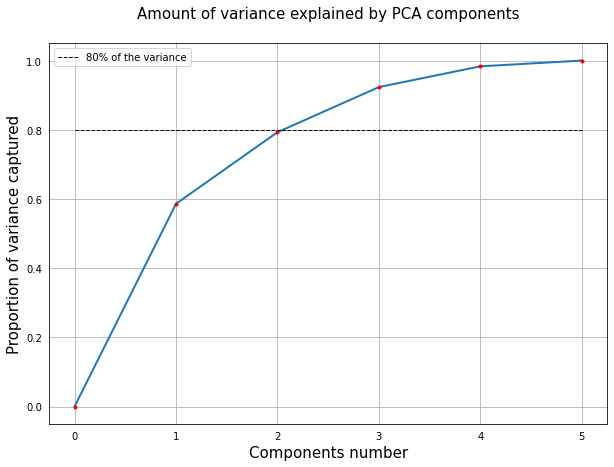

The first TWO PC capture 79.30% of the variance


In [51]:
n_components=5
pca = PCA(n_components)
pca.fit(Normalized_meta[['pop', 'mile', 'VOMS', 'revenue', 'survey_response']].values)
list_variance = pca.explained_variance_ratio_

plt.figure(figsize = (10,7))
ax = plt.gca()
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),linewidth = 2)
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),'.',c='r',markersize = 6)
plt.plot(range(0, n_components+1),[0.80 for i in range(0, n_components+1)],'--',c = 'black',
         linewidth = 1,label="80% of the variance")
plt.legend()
plt.xlabel('Components number',fontsize = 15)
plt.ylabel('Proportion of variance captured',fontsize = 15)
plt.title('Amount of variance explained by PCA components',fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(0, 22, step=1))
ax.grid(True)
plt.show()
print("The first TWO PC capture {:.2f}%".format(100*(np.cumsum([0] + list(list_variance))[2])),"of the variance")

([<matplotlib.axis.XTick at 0x169a01b50>,
 [Text(1, 0, 'pop'),
  Text(2, 0, 'mile'),
  Text(3, 0, 'VOMS'),
  Text(4, 0, 'revenue'),
  Text(5, 0, 'survey_response')])

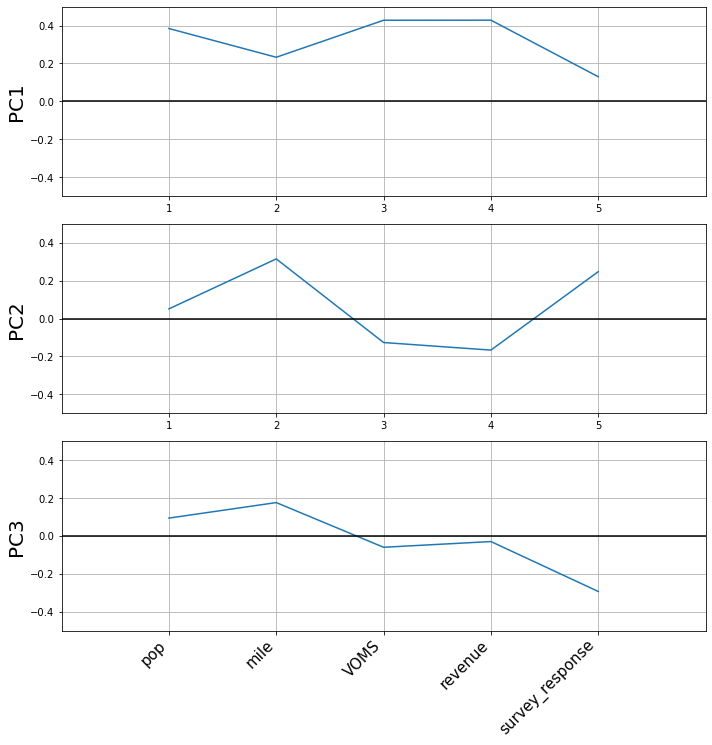

In [52]:
# eigenvectors = pca.components_
eigenvectors = pca.components_.T * np.sqrt(list_variance[0:5])
eigenvectors = eigenvectors.T
x = range(1,6)
i = 1
plt.figure(figsize=(10,15))

for eigenvector in eigenvectors[:3]:
    plt.subplot(5,1,i)
    plt.plot(x, eigenvector)
    plt.axhline(0, color = 'black')
    plt.xticks(np.arange(1,6))
    plt.ylabel('PC%d' %i, fontsize=20)
    plt.xlim([0,6])
    plt.ylim([-0.5, 0.5])
    plt.grid()
    plt.tight_layout()
    i +=1
plt.xticks(np.arange(1, 6), ['pop', 'mile', 'VOMS', 'revenue', 'survey_response'],rotation=45,horizontalalignment='right', fontsize=15)

### K-Means

In [53]:
Sum_of_squared_distances = []

K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Normalized_meta[['pop', 'mile', 'VOMS', 'revenue', 'survey_response']].values)
    Sum_of_squared_distances.append(km.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


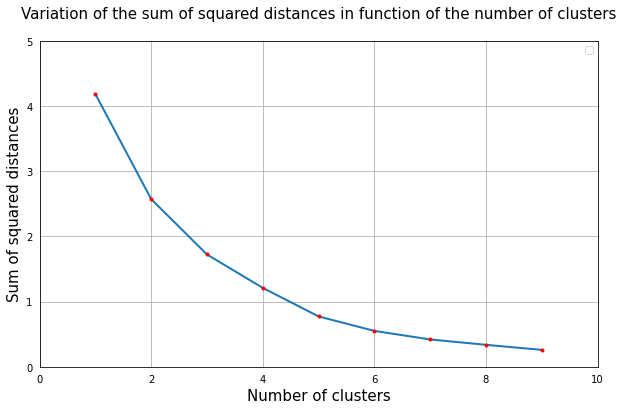

In [54]:
plt.figure(figsize = (10,6))
ax = plt.gca()
plt.plot(K, Sum_of_squared_distances, linewidth = 2)
plt.plot(K, Sum_of_squared_distances, '.', c='r',markersize = 6)

plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Sum of squared distances', fontsize = 15)
plt.title('Variation of the sum of squared distances in function of the number of clusters', fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.xlim(0,10)
plt.ylim(0,5)
ax.grid(True)
plt.legend()
plt.show()

## All attributes

### Correlation Plot

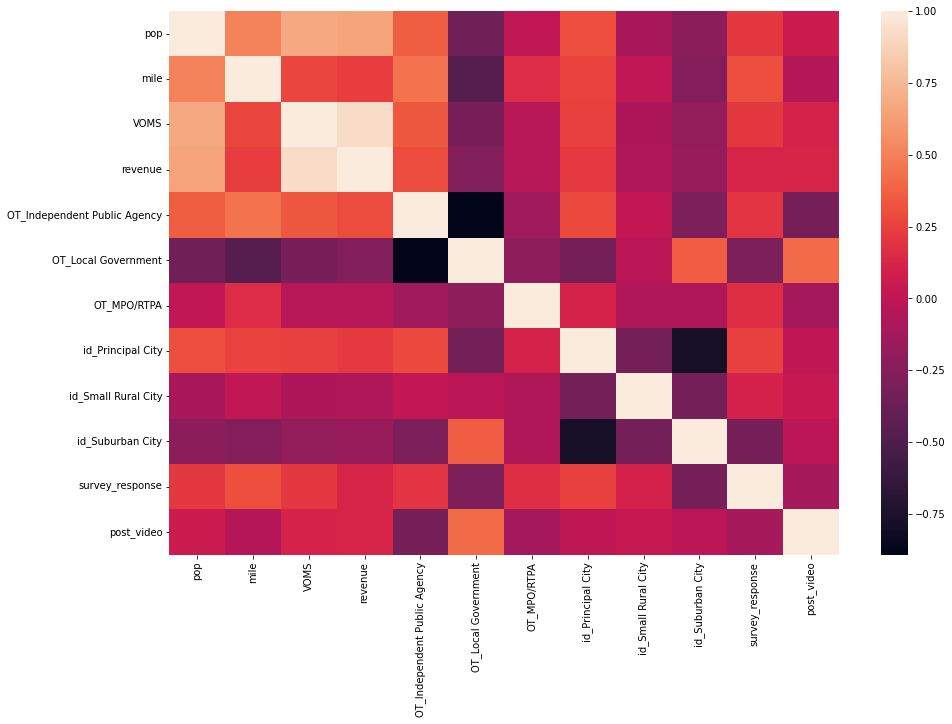

In [55]:
fig = plt.figure(figsize=[15, 10])
corr_matrix = Normalized_meta.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()

### PCA

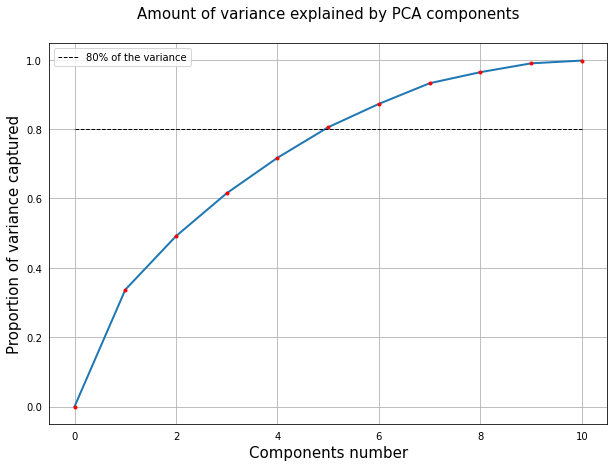

The first five PC capture 80.54% of the variance


In [56]:
n_components=10
pca = PCA(n_components)
pca.fit(Normalized_meta.values)
list_variance = pca.explained_variance_ratio_

plt.figure(figsize = (10,7))
ax = plt.gca()
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),linewidth = 2)
plt.plot(range(0, n_components+1), np.cumsum([0] + list(list_variance)),'.',c='r',markersize = 6)
plt.plot(range(0, n_components+1),[0.80 for i in range(0, n_components+1)],'--',c = 'black',
         linewidth = 1,label="80% of the variance")
plt.legend()
plt.xlabel('Components number',fontsize = 15)
plt.ylabel('Proportion of variance captured',fontsize = 15)
plt.title('Amount of variance explained by PCA components',fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#plt.xticks(np.arange(0, 22, step=1))
ax.grid(True)
plt.show()
print("The first five PC capture {:.2f}%".format(100*(np.cumsum([0] + list(list_variance))[5])),"of the variance")

([<matplotlib.axis.XTick at 0x1698dac40>,
 [Text(1, 0, 'pop'),
  Text(2, 0, 'mile'),
  Text(3, 0, 'VOMS'),
  Text(4, 0, 'revenue'),
  Text(5, 0, 'OT_Independent Public Agency'),
  Text(6, 0, 'OT_Local Government'),
  Text(7, 0, 'OT_MPO/RTPA'),
  Text(8, 0, 'id_Principal City'),
  Text(9, 0, 'id_Small Rural City'),
  Text(10, 0, 'id_Suburban City'),
  Text(11, 0, 'survey_response'),
  Text(12, 0, 'post_video')])

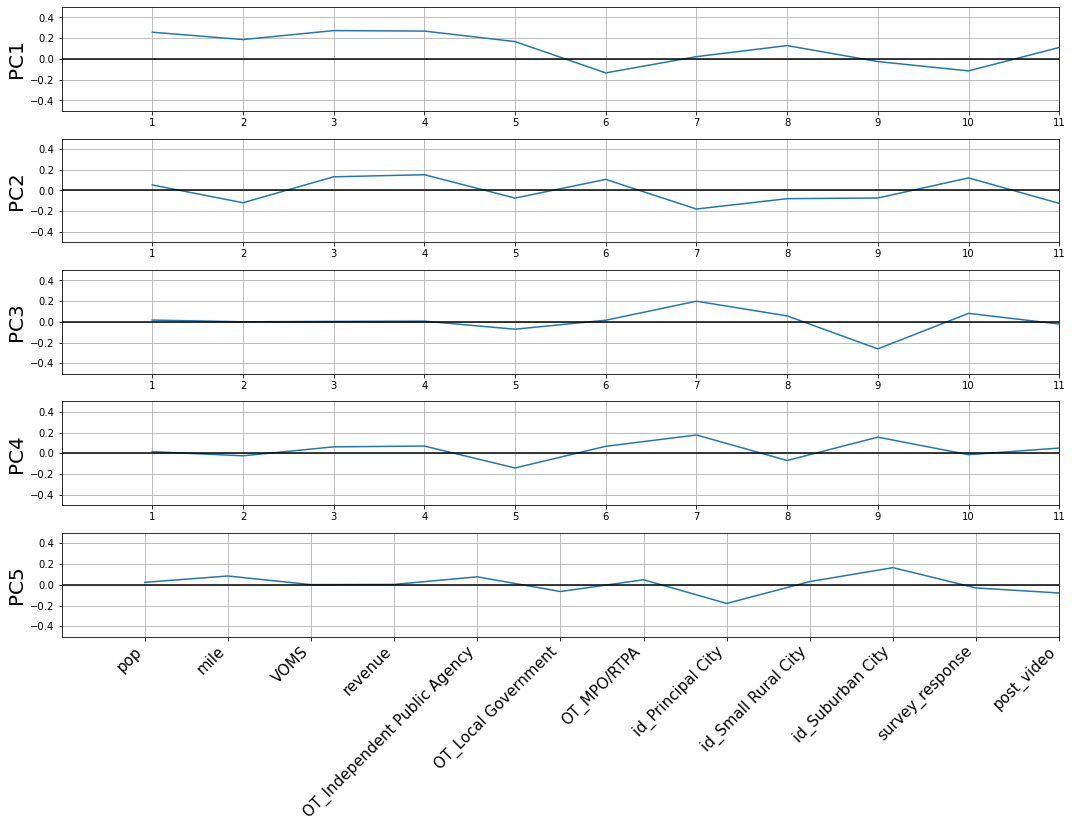

In [57]:
# eigenvectors = pca.components_
eigenvectors = pca.components_.T * np.sqrt(list_variance[0:10])
eigenvectors = eigenvectors.T
x = range(1,13)
i = 1
plt.figure(figsize=(15,20))

for eigenvector in eigenvectors[:5]:
    plt.subplot(11,1,i)
    plt.plot(x, eigenvector)
    plt.axhline(0, color = 'black')
    plt.xticks(np.arange(1, 12))
    plt.ylabel('PC%d' %i, fontsize=20)
    plt.xlim([0,11])
    plt.ylim([-0.5, 0.5])
    plt.grid()
    plt.tight_layout()
    i +=1
plt.xticks(np.arange(1, 13), list(column),rotation=45,horizontalalignment='right', fontsize=15)

### K-Means

In [58]:
Sum_of_squared_distances = []

K = range(1,30)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(Normalized_meta.drop(columns = 'survey_response').values)
    Sum_of_squared_distances.append(km.inertia_)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


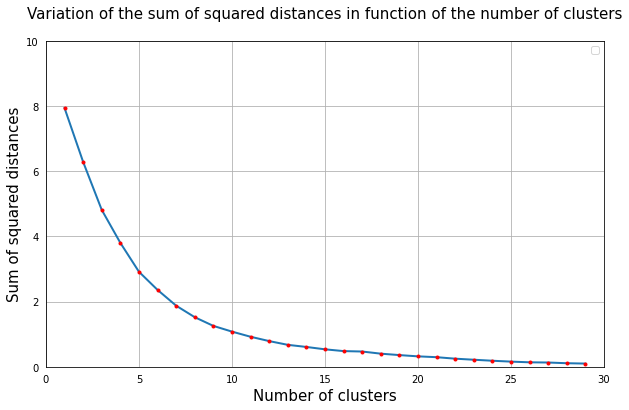

In [59]:
plt.figure(figsize = (10,6))
ax = plt.gca()
plt.plot(K, Sum_of_squared_distances, linewidth = 2)
plt.plot(K, Sum_of_squared_distances, '.', c='r',markersize = 6)

plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('Sum of squared distances', fontsize = 15)
plt.title('Variation of the sum of squared distances in function of the number of clusters', fontsize = 15, y = 1.05)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.xlim(0,30)
plt.ylim(0,10)
ax.grid(True)
plt.legend()
plt.show()

# Analysis - Agencies post meeting videos

In [64]:
agency_video = transit_survey_video[transit_survey_video['Count - video(past 12 months)'] > 12]
agency_video.head()

,Video/ Audio,URL,Transit relevent ?,Count - video(past 12 months),Count - Meetings (past 12 months),Transportation Commission/City Counsil/ Planning Commission?,Mentioned Transportation Topic?,Transportation Commission Existed?,Transportation Commission video posted (>2 in the last year)?,"If no transportation commission, other meetings posted?",...,Zip,Phone,Primary Contact - Title,CALACT,Contact,Email.y,CATEGORY,OT,City,post_video
2,granicus,https://actransit.legistar.com/Calendar.aspx,Yes,36.0,90,NaN,NaN,NaN,NaN,NaN,...,94612,510-891-7213,Accessible Services Manager,CALACT Member,Mallory Nestor-Brush,mnestor@actransit.org,NaN,Independent Public Agency,Oakland,1
3,own website,https://spectrumstream.com/streaming/alhambra/...,No,19.0,150,NaN,NaN,NaN,NaN,NaN,...,91801,626-570-3254,Fleet Manager,CALACT Member,Joseph Villegas,jvillegas@cityofalhambra.org,NaN,Local Government,Alhambra,1
4,own website,http://alpinecountyca.iqm2.com/citizens/defaul...,No,30.0,43,NaN,NaN,NaN,NaN,NaN,...,96120,530-694-2140,Community Development Manager,CALACT Member,Debbie Burkett,dburkett@alpinecountyca.gov,NaN,MPO/RTPA,Markleeville,1
9,own website,https://spectrumstream.com/streaming/arcadia/l...,No,21.0,21,NaN,NaN,NaN,NaN,NaN,...,91066-6021,626-574-5435,Transportation Services Manager,CALACT Member,Linda Hui,lhui@arcadiaca.gov,Local Government,Local Government,Arcadia,1
10,own website,http://arcataca.iqm2.com/Citizens/Calendar.aspx,No,68.0,128,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Local Government,Arcata,1


In [66]:
print('Number of agencies: ',len(transit_survey_video))
print('Number of agencies that have revenue/pop/mile data: ', len(log_meta))
print('Number of agencies that post videos: ',len(agency_video))
print('Number of agencies that post videos and have revenue/pop/mile data: ', len(log_meta[log_meta['post_video']==1]))

Number of agencies:  226
Number of agencies that have revenue/pop/mile data:  129
Number of agencies that post videos:  109
Number of agencies that post videos and have revenue/pop/mile data:  75


Text(0.5, 1.0, 'Agencies post videos')

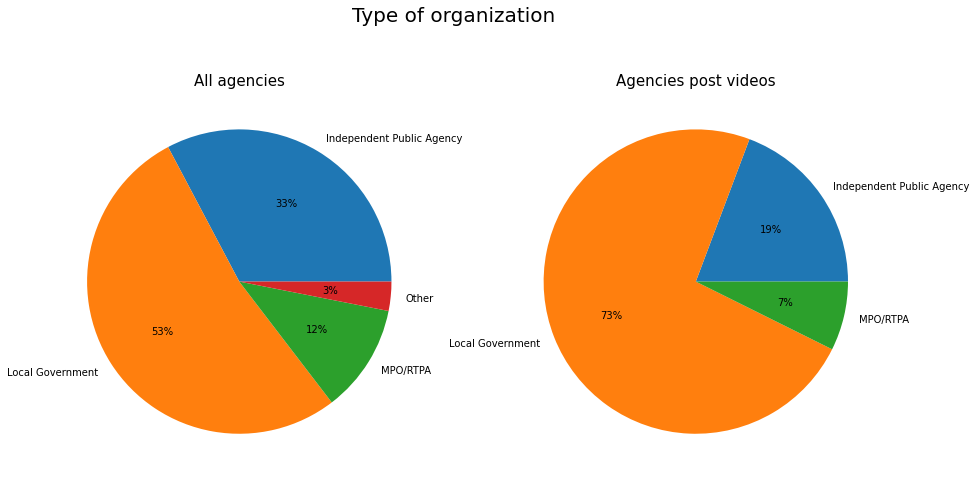

In [222]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle('Type of organization', fontsize = 20, ha='center',va='top')

plt.subplot(121)
plt.pie(transit_survey['OrgType'].value_counts().sort_index(), 
        labels = transit_survey['OrgType'].value_counts().sort_index().index.tolist(), 
        autopct='%.0f%%')
plt.title('All agencies', fontsize = 15)

plt.subplot(122)
plt.pie(agency_video['OT'].value_counts().sort_index(), 
        labels = agency_video['OT'].value_counts().sort_index().index.tolist(), 
        autopct='%.0f%%')

plt.title('Agencies post videos', fontsize = 15)

Text(0.5, 1.0, 'Agencies post videos')

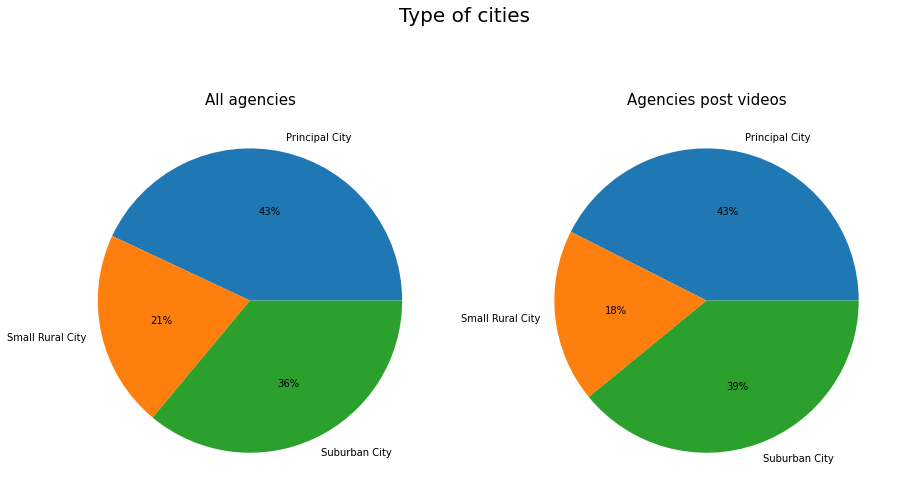

In [223]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle('Type of cities', fontsize = 20, ha='center',va='bottom')

plt.subplot(121)
plt.pie(transit_survey['id'].value_counts().sort_index(), labels = transit_survey['id'].value_counts().sort_index().index.tolist(), autopct='%.0f%%')
plt.title('All agencies', fontsize = 15)

plt.subplot(122)
plt.pie(agency_video['id'].value_counts().sort_index(), labels = agency_video['id'].value_counts().sort_index().index.tolist(), autopct='%.0f%%')
plt.title('Agencies post videos', fontsize = 15)

## Linear Regression

In [118]:
'''
Y(post_video) = a x log(pop) + c
'''

Y = log_meta['post_video']
X = log_meta[['pop']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             post_video   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.06192
Date:                Sun, 18 Jun 2023   Prob (F-statistic):              0.804
Time:                        10:08:59   Log-Likelihood:                -91.863
No. Observations:                 129   AIC:                             187.7
Df Residuals:                     127   BIC:                             193.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6717      0.366      1.837      0.068      -0.052       1.395
pop           -0.0075      0.030     -0.249      0.804      -0.067       0.052
==============================================================================
Omnibus:                      979.831   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.523
Skew:                          -0.330   Prob(JB):                     2.12e-05
Kurtosis:                       1.111   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
'''
Y(post_video) = a x log(revenue) + c
'''

Y = log_meta['post_video']
X = log_meta[['revenue']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             post_video   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                  0.009530
Date:                Sun, 18 Jun 2023   Prob (F-statistic):              0.922
Time:                        10:33:52   Log-Likelihood:                -91.890
No. Observations:                 129   AIC:                             187.8
Df Residuals:                     127   BIC:                             193.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5486      0.339      1.620      0.108      -0.122       1.219
revenue        0.0021      0.021      0.098      0.922      -0.040       0.044
==============================================================================
Omnibus:                      978.024   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.557
Skew:                          -0.330   Prob(JB):                     2.08e-05
Kurtosis:                       1.109   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
'''
Y(post_video) = a x log(mile) + c
'''

Y = log_meta['post_video']
X = log_meta[['mile']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             post_video   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.373
Date:                Sun, 18 Jun 2023   Prob (F-statistic):             0.0385
Time:                        10:35:00   Log-Likelihood:                -89.711
No. Observations:                 129   AIC:                             183.4
Df Residuals:                     127   BIC:                             189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7777      0.103      7.530      0.000       0.573       0.982
mile          -0.0503      0.024     -2.091      0.039      -0.098      -0.003
==============================================================================
Omnibus:                     1202.087   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.755
Skew:                          -0.308   Prob(JB):                     8.46e-05
Kurtosis:                       1.236   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
'''
Y(post_video) = a x log(pop) + b x log(revenue) + c
'''

Y = log_meta['post_video']
X = log_meta[['pop', 'revenue']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             post_video   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2057
Date:                Sun, 18 Jun 2023   Prob (F-statistic):              0.814
Time:                        10:35:58   Log-Likelihood:                -91.684
No. Observations:                 129   AIC:                             189.4
Df Residuals:                     126   BIC:                             197.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6418      0.370      1.735      0.085      -0.090       1.374
pop           -0.0366      0.058     -0.634      0.527      -0.151       0.078
revenue        0.0238      0.040      0.591      0.555      -0.056       0.104
==============================================================================
Omnibus:                      992.567   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.319
Skew:                          -0.330   Prob(JB):                     2.35e-05
Kurtosis:                       1.121   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
'''
Y(post_video) = a x log(pop) + b x log(mile) + c
'''

Y = log_meta['post_video']
X = log_meta[['pop', 'mile']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             post_video   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     4.576
Date:                Sun, 18 Jun 2023   Prob (F-statistic):             0.0121
Time:                        10:36:40   Log-Likelihood:                -87.372
No. Observations:                 129   AIC:                             180.7
Df Residuals:                     126   BIC:                             189.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1710      0.451     -0.379      0.705      -1.064       0.722
pop            0.0985      0.046      2.157      0.033       0.008       0.189
mile          -0.1119      0.037     -3.014      0.003      -0.185      -0.038
==============================================================================
Omnibus:                     3275.495   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.288
Skew:                          -0.359   Prob(JB):                     0.000290
Kurtosis:                       1.414   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""